# Logistic Regression for Titanic Dataset:

**Objective:**
**1. Data Exploration:**


a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

**2. Data Preprocessing:**
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.

**3. Model Building:**
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.

**4. Model Evaluation:**
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.

**5. Interpretation:**
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).

**6. Deployment with Streamlit:**
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.


In [ ]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

cf.go_offline()
cf.set_config_file(world_readable=True, theme='pearl')
%matplotlib inline


In [ ]:
# 2. Load Data
train_data = pd.read_csv('/content/Titanic_train.csv')
test_data = pd.read_csv('/content/Titanic_test.csv')
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 3. Data Cleaning & Feature Engineering
def impute_age(cols):
    Age, Pclass = cols
    if pd.isnull(Age):
        return 37 if Pclass == 1 else 29 if Pclass == 2 else 24
    else:
        return Age

def impute_test_age(cols):
    Age, Pclass = cols
    if pd.isnull(Age):
        return 42 if Pclass == 1 else 27 if Pclass == 2 else 25
    else:
        return Age

train_data['Age'] = train_data[['Age', 'Pclass']].apply(impute_age, axis=1)
test_data['Age'] = test_data[['Age', 'Pclass']].apply(impute_test_age, axis=1)

train_data.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
test_data.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

train_data.dropna(inplace=True)
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

test_passenger_id = test_data['PassengerId']
train_data.drop(['PassengerId'], axis=1, inplace=True)
test_data.drop(['PassengerId'], axis=1, inplace=True)


<ipython-input-3-4055640873>:23: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
# 4. Prepare Train and Validation Sets
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X1_Train, X1_Val, y1_Train, y1_Val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = RobustScaler()
X1_Train = scaler.fit_transform(X1_Train)
X1_Val = scaler.transform(X1_Val)
test_data = scaler.transform(test_data)


Accuracy: 0.7921348314606742
Recall: 0.782608695652174
Precision: 0.7105263157894737
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       109
           1       0.71      0.78      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178

ROC AUC Score: 0.8506182688472277


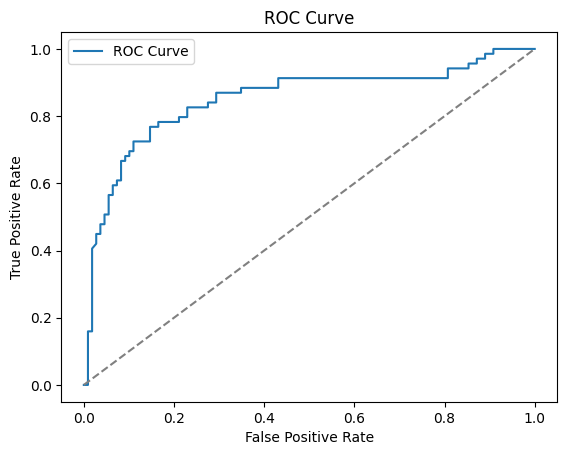

In [ ]:
# 5. Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=4000)
log_reg.fit(X1_Train, y1_Train)

# Predict on Validation Set
y1_pred = log_reg.predict(X1_Val)

# Evaluation
print("Accuracy:", metrics.accuracy_score(y1_Val, y1_pred))
print("Recall:", metrics.recall_score(y1_Val, y1_pred))
print("Precision:", metrics.precision_score(y1_Val, y1_pred))
print("Classification Report:\n", classification_report(y1_Val, y1_pred))

# ROC AUC and Curve
y1_prob = log_reg.predict_proba(X1_Val)[:, 1]
print("ROC AUC Score:", roc_auc_score(y1_Val, y1_prob))

fpr, tpr, _ = roc_curve(y1_Val, y1_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Logistic Regression Model Performance Summary

---

#### **Model Evaluation Metrics**

| Metric              | Value                     |
|---------------------|---------------------------|
| **Accuracy**        | 0.792                     |
| **Recall** (Survived - 1) | 0.783             |
| **Precision**       | 0.711                     |
| **F1-Score** (Survived - 1) | 0.739           |
| **ROC AUC Score**   | **0.851**                 |

---

#### **Classification Report**

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| **0** (Not Survived) | 0.85      | 0.80   | 0.82     | 109     |
| **1** (Survived)     | 0.71      | 0.78   | 0.74     | 69      |

- **Macro Avg**: Average across both classes (unweighted)
- **Weighted Avg**: Takes class imbalance into account

---

#### **Interpretation**

- The model correctly predicted ~79% of cases.
- It performs better at predicting **non-survivors (class 0)** than survivors (class 1).
- The **ROC AUC Score of 0.85** indicates a strong ability to distinguish between the classes.

---

#### **Limitations & Next Steps**

- **Threshold Tuning**: Currently using the default threshold of 0.5. You may adjust this for better precision/recall trade-off.
- **No Hyperparameter Tuning**: Consider adjusting `C`, solver, or regularization techniques.
- **Feature Engineering**: Explore new features such as:
  - Title extraction from names (Mr, Mrs, Miss)
  - FamilySize = SibSp + Parch + 1
  - IsAlone = (FamilySize == 1)
- **Model Assumption**: Logistic regression assumes a linear relationship between features and log-odds — nonlinear models might perform better.

---


In [ ]:
# 6. Predict on Test Set and Create Submission
test_predictions = log_reg.predict(test_data)
submission = pd.DataFrame({'PassengerId': test_passenger_id, 'Survived': test_predictions})
submission.to_csv('submission.csv', index=False)
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


**Model Deployment:** Saving the Trained Model

In [ ]:
import joblib

# Save model
joblib.dump(log_reg, 'logistic_model.pkl')


['logistic_model.pkl']

In [ ]:
import os
os.getcwd()


'/content'

Interview Questions:
1. What is the difference between precision and recall?

Precision and recall are performance metrics used to evaluate classification models, especially in imbalanced datasets:

Precision = TP / (TP + FP)
It tells you how many of the predicted positives are actually correct.

High precision means few false positives.

Recall = TP / (TP + FN)
It tells you how many of the actual positives were correctly identified.

High recall means few false negatives.

Trade-off: Increasing one often reduces the other. That’s why the F1-score, the harmonic mean of precision and recall, is also used.


2. What is cross-validation, and why is it important in binary classification?


Cross-validation is a technique for assessing how a model will generalize to an independent dataset. It involves splitting the dataset into multiple folds, training on some folds and testing on the remaining ones, then averaging the results.

Example: In k-fold cross-validation, the data is split into k parts; each part is used once as the test set, while the remaining k-1 parts are used for training.

Why it's important:

Reduces risk of overfitting or underfitting.

Gives a more robust estimate of model performance than a single train-test split.

Especially crucial in binary classification, where class imbalance can bias metrics.